<b>Modules

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Flatten
from tensorflow.keras.layers import Dense , MaxPooling2D

<b>Load Mnist Dataset

In [2]:
# Load the Dataset
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

# Display the Shape of the Dataset
print(f"Shape of the X Train is : {x_train.shape}")
print(f"Shape of the Y Train is : {y_train.shape}")
print(f"Shape of the X Test  is : {x_test.shape}")
print(f"Shape of the Y Test  is : {y_test.shape}")

Shape of the X Train is : (60000, 28, 28)
Shape of the Y Train is : (60000,)
Shape of the X Test  is : (10000, 28, 28)
Shape of the Y Test  is : (10000,)


<b>Visualization MNIST Images

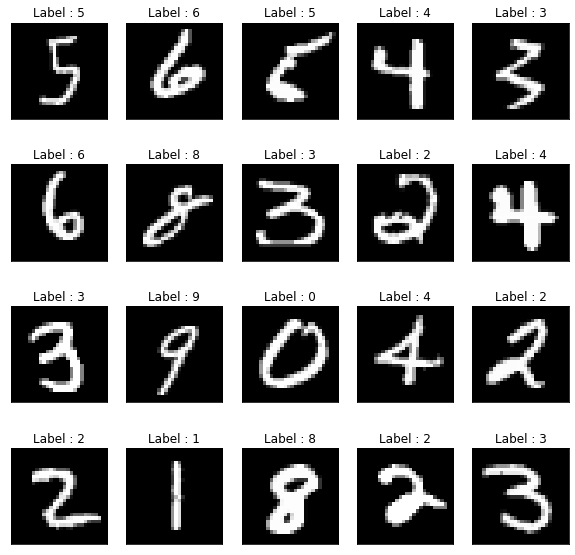

In [3]:
# Set the Figure
plt.figure(figsize = (10,10))

# Display the 20 Images with Randomly
for index in range(20):
    plt.subplot(4,5,index+1)
    img_no = random.randint(0,60000)
    plt.imshow(x_train[img_no] , cmap = "gray")
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Label : {y_train[img_no]}")
plt.show()

<b>Preprocessing Images

In [15]:
# Chnage the Type of Images (convert into floating point)
x_train = x_train.astype(np.float64)
x_test  = x_test.astype(np.float64)

# Convert the Label into OneHotEncoder
y_train = to_categorical(y_train , num_classes=10)
y_test  = to_categorical(y_test  , num_classes=10)

# Normalize the Data
x_train /= 255
x_test  /= 255

In [16]:
# Display the Shape of the Training and Testing
print(f"Shape of the X Train is : {x_train.shape}")
print(f"Shape of the Y Train is : {y_train.shape}")
print(f"Shape of the X Test  is : {x_test.shape}")
print(f"Shape of the Y Test  is : {y_test.shape}")

Shape of the X Train is : (60000, 28, 28)
Shape of the Y Train is : (60000, 10)
Shape of the X Test  is : (10000, 28, 28)
Shape of the Y Test  is : (10000, 10)


<b>CNN Model

In [17]:
# Create the CNN Model for MNIST Dataset
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu' , input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the Model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
# Display the Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               540900    
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

<b>Train the CNN Model in (Training Dataset)

In [18]:
history = model.fit(x_train , y_train , epochs = 5 , batch_size = 64)

Epoch 1/5
938/938 [==============================] - 36s 38ms/step - loss: 1.0850 - accuracy: 0.6886
Epoch 2/5
938/938 [==============================] - 42s 45ms/step - loss: 0.3913 - accuracy: 0.8859
Epoch 3/5
938/938 [==============================] - 34s 37ms/step - loss: 0.3264 - accuracy: 0.9038
Epoch 4/5
938/938 [==============================] - 33s 35ms/step - loss: 0.2970 - accuracy: 0.9132
Epoch 5/5
938/938 [==============================] - 32s 34ms/step - loss: 0.2723 - accuracy: 0.9203


In [19]:
# Evaluate the Model in the Training Dataset
model.evaluate(x_train , y_train)

1875/1875 [==============================] - 15s 8ms/step - loss: 0.2573 - accuracy: 0.9245


[0.25730210542678833, 0.9244666695594788]

<b>Predict the Result in the Testing Dataset

In [22]:
# Define the List for Y Prediction
y_pred = []
y_true = []

# Load the One by One Images
for index in range(0,len(x_test)):
    prediction = model.predict(np.expand_dims(x_test[index], axis=0))
    y_pred.append(np.argmax(prediction))
    y_true.append(np.argmax(y_test[index]))

1/1 [==============================] - 0s 21ms/step


<b>Visualization Prediction Dataset

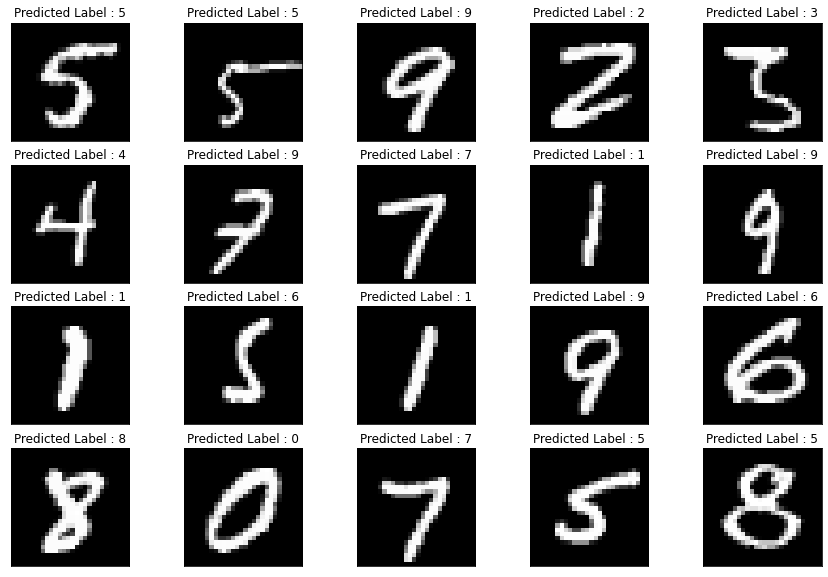

In [24]:
# Set the Figure
plt.figure(figsize = (15,10))

# Display the 20 Images with Randomly
for index in range(20):
    plt.subplot(4,5,index+1)
    img_no = random.randint(0,len(x_test))
    plt.imshow(x_test[img_no] , cmap = "gray")
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Predicted Label : {y_pred[img_no]}")
plt.show()